In [5]:
import pandas as pd
from IPython.display import display

normal = pd.read_csv('df_total.csv')
display(normal)

random = pd.read_csv('random.csv')
display(random)

,key,vector,model,comb,real
0,chemical burn,0.873047,0.74,0.377338,True
1,severe burn,0.427026,0.01,0.102233,False
2,burn intoxication inhalation,0.388180,0.03,0.097824,False
3,fire,0.261804,0.03,0.068261,False
4,cardiopulmonary,0.239913,0.05,0.067819,False
...,...,...,...,...,...
1867,cardiopulmonary,0.114865,0.00,0.043262,False
1868,sting,0.109937,0.00,0.041406,False
1869,fire,0.099745,0.00,0.037567,False
1870,electrocution,0.096314,0.00,0.036275,False


,key,vector,model,comb,real
0,severe burn,0.048391,0.02,0.102301,False
1,hemorrhage,0.066876,0.00,0.100034,False
2,food poisoning,0.050454,0.01,0.090428,False
3,cardiopulmonary,0.058704,0.00,0.087810,False
4,hypoglycemia,0.056367,0.00,0.084315,False
...,...,...,...,...,...
475,severe burn,0.073751,0.00,0.070171,False
476,electrocution,0.037360,0.02,0.054575,False
477,epilepsy,0.054829,0.00,0.052167,False
478,chemical burn,0.046218,0.00,0.043975,False


In [12]:
vector_normal_true = list(normal[normal['real']==True]['vector'])
vector_normal_false = list(normal[normal['real']==False]['vector'])
vector_random = list(random['vector'])

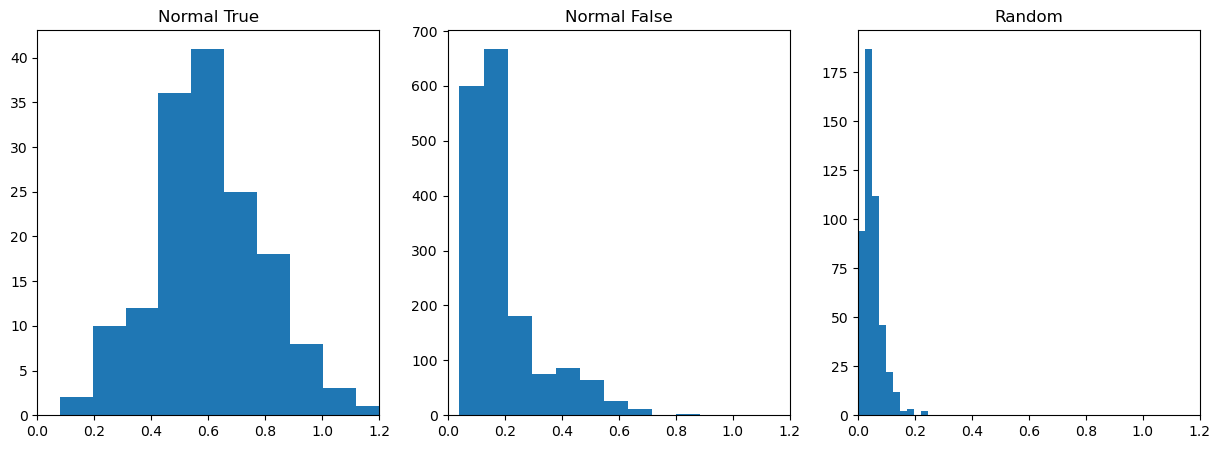

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

plt.hist(vector_normal_true)
plt.xlim(0, 1.2)
plt.title('Normal True')

plt.subplot(1, 3, 2)
plt.hist(vector_normal_false)
plt.xlim(0, 1.2)
plt.title('Normal False')

plt.subplot(1, 3, 3)
plt.hist(vector_random)
plt.xlim(0, 1.2)
plt.title('Random')


plt.show()

In [23]:
len(normal)

1872

In [35]:
threshold = 1.2
i=0
suma_normal = []
dataframe = normal
while i < len(dataframe):
    pack = dataframe[i:i+12]
    suma = pack['vector'].sum()
    suma_normal.append(suma)
    i+=12
    if suma<threshold:
        display(pack)

i=0
suma_random = []
dataframe = random
while i < len(dataframe):
    pack = dataframe[i:i+12]
    suma = pack['vector'].sum()
    suma_random.append(suma)
    i+=12
    print(pack['vector'].max())
    if suma>threshold:
        display(pack)

,key,vector,model,comb,real
1500,food poisoning,0.064497,0.06,0.130109,False
1501,choking,0.099142,0.00,0.103611,False
1502,hypoglycemia,0.089165,0.00,0.093184,False
1503,cardiopulmonary,0.078639,0.01,0.092635,True
1504,chemical burn,0.088310,0.00,0.092291,False
1505,hemorrhage,0.084785,0.00,0.088607,False
1506,epilepsy,0.083002,0.00,0.086743,False
1507,severe burn,0.069556,0.00,0.072691,False
1508,electrocution,0.063621,0.00,0.066489,False
1509,fire,0.061282,0.00,0.064045,False


0.0668757110834121
0.1269676238298416
0.1350570023059845
0.0996245667338371
0.079532504081726
0.1743389815092086
0.1588987708091735
0.1350898444652557
0.0737962201237678
0.0766502991318702
0.1245597302913665
0.136612132191658
0.2445531785488128


,key,vector,model,comb,real
144,cardiopulmonary,0.244553,0.09,0.183787,False
145,fire,0.129494,0.17,0.164527,False
146,burn intoxication inhalation,0.175955,0.08,0.140609,False
147,hypoglycemia,0.165749,0.00,0.091054,False
148,choking,0.085908,0.06,0.080155,False
149,sting,0.078369,0.06,0.076013,False
150,food poisoning,0.105291,0.00,0.057842,False
151,hemorrhage,0.101181,0.00,0.055584,False
152,severe burn,0.089967,0.00,0.049424,False
153,chemical burn,0.070251,0.00,0.038592,False


0.0299311000853776
0.0905196741223335
0.0672745630145073
0.1076084077358245
0.1035671755671501
0.1336451917886734
0.0644583851099014
0.0117580527439713
0.0435750186443328
0.0811593830585479
0.0300909839570522
0.1247017532587051
0.1075536236166954
0.049002531915903
0.2349222410547366
0.0649572610855102
0.0544013194739818
0.0517351925373077
0.0871206820011138
0.0701372325420379
0.0635281950235366
0.0717986896634101
0.0729256719350814
0.0509669333696365
0.0966513305902481
0.1719802767038345
0.104917474091053


In [69]:
import warnings
warnings.filterwarnings('ignore')


i=0
dataframe = normal
dicc = {}

count = 0
while i < len(dataframe):
    pack = dataframe[i:i+12]
    indice = list(pack['real']).index(True)+1

    valor_max_comb = pack['comb'].max()
    valor_max_vector = pack['vector'].max()
    filtered = pack[(pack['comb']>valor_max_comb*0.8) | (pack['vector']>valor_max_vector*0.8)]


    if True not in list(filtered['real']):
        count+=1
        display(pack,i/12)
    else:
        if len(filtered) in dicc:
            dicc[len(filtered)]+=1
        else:
            dicc[len(filtered)]=1
        
    i+=12

print(count)
print(dicc)

,key,vector,model,comb,real
228,food poisoning,0.573104,0.39,0.290747,False
229,hypoglycemia,0.537130,0.07,0.183284,False
230,burn intoxication inhalation,0.283832,0.03,0.094741,True
231,fire,0.222302,0.02,0.073147,False
232,chemical burn,0.178162,0.01,0.056803,False
233,severe burn,0.177488,0.00,0.053581,False
234,epilepsy,0.175230,0.00,0.052899,False
235,hemorrhage,0.166367,0.00,0.050224,False
236,sting,0.153162,0.00,0.046237,False
237,cardiopulmonary,0.147175,0.00,0.044430,False


19.0

,key,vector,model,comb,real
276,chemical burn,0.459505,0.37,0.252051,False
277,hemorrhage,0.437626,0.01,0.136014,False
278,burn intoxication inhalation,0.349069,0.07,0.127337,True
279,food poisoning,0.259022,0.02,0.084783,False
280,hypoglycemia,0.231858,0.02,0.076529,False
281,fire,0.153730,0.06,0.064943,False
282,epilepsy,0.175618,0.00,0.053363,False
283,choking,0.161543,0.01,0.052124,False
284,severe burn,0.143432,0.00,0.043583,False
285,cardiopulmonary,0.118697,0.02,0.042144,False


23.0

,key,vector,model,comb,real
732,severe burn,0.495670,0.32,0.254091,False
733,sting,0.302857,0.04,0.106804,True
734,chemical burn,0.239378,0.05,0.090144,False
735,hemorrhage,0.245840,0.04,0.089043,False
736,burn intoxication inhalation,0.158349,0.12,0.086709,False
737,food poisoning,0.220277,0.05,0.084194,False
738,choking,0.189695,0.02,0.065322,False
739,epilepsy,0.192463,0.01,0.063070,False
740,hypoglycemia,0.157547,0.00,0.049078,False
741,cardiopulmonary,0.143682,0.01,0.047874,False


61.0

,key,vector,model,comb,real
768,severe burn,0.237954,0.13,0.131153,False
769,hypoglycemia,0.310855,0.04,0.125058,False
770,hemorrhage,0.294104,0.05,0.122652,False
771,food poisoning,0.243703,0.04,0.101122,False
772,epilepsy,0.227989,0.02,0.088393,False
773,cardiopulmonary,0.220391,0.02,0.085684,False
774,sting,0.221335,0.00,0.078892,True
775,choking,0.182383,0.01,0.068572,False
776,chemical burn,0.179088,0.00,0.063834,False
777,burn intoxication inhalation,0.157801,0.00,0.056246,False


64.0

,key,vector,model,comb,real
1368,cardiopulmonary,0.661535,0.27,0.230010,False
1369,food poisoning,0.498583,0.35,0.209527,False
1370,burn intoxication inhalation,0.495159,0.10,0.146953,False
1371,fire,0.364812,0.08,0.109831,False
1372,choking,0.299316,0.03,0.081313,True
1373,hypoglycemia,0.161071,0.01,0.042240,False
1374,hemorrhage,0.146842,0.02,0.041196,False
1375,sting,0.143000,0.00,0.035309,False
1376,epilepsy,0.131573,0.00,0.032487,False
1377,severe burn,0.109450,0.00,0.027025,False


114.0

,key,vector,model,comb,real
1500,food poisoning,0.064497,0.06,0.130109,False
1501,choking,0.099142,0.00,0.103611,False
1502,hypoglycemia,0.089165,0.00,0.093184,False
1503,cardiopulmonary,0.078639,0.01,0.092635,True
1504,chemical burn,0.088310,0.00,0.092291,False
1505,hemorrhage,0.084785,0.00,0.088607,False
1506,epilepsy,0.083002,0.00,0.086743,False
1507,severe burn,0.069556,0.00,0.072691,False
1508,electrocution,0.063621,0.00,0.066489,False
1509,fire,0.061282,0.00,0.064045,False


125.0

6
{1: 86, 2: 40, 3: 15, 4: 9}


In [60]:
for x in dicc:
    print(x, len(dicc[x]))
    dataframe = pd.concat(dicc[x])
    display(dataframe)
    print("Vector", dataframe['vector'].min(), dataframe['vector'].max())
    print("Comb", dataframe['comb'].min(), dataframe['comb'].max())


1 131


,key,vector,model,comb,real
0,chemical burn,0.873047,0.74,0.377338,True
12,chemical burn,0.238056,0.65,0.330044,True
24,chemical burn,0.974045,0.93,0.369657,True
36,chemical burn,0.532771,0.29,0.202842,True
48,chemical burn,0.473691,0.38,0.363678,True
...,...,...,...,...,...
1776,hypoglycemia,0.521513,0.72,0.419702,True
1788,hypoglycemia,0.492956,0.68,0.448755,True
1812,hypoglycemia,0.728284,0.57,0.383689,True
1848,hypoglycemia,0.453411,0.03,0.244763,True


Vector 0.2037245780229568 1.2318730496873664
Comb 0.155199729036253 0.6086896644230324
2 17


,key,vector,model,comb,real
84,severe burn,0.585032,0.42,0.236957,False
85,chemical burn,0.621478,0.25,0.205469,True
120,severe burn,0.711115,0.36,0.294989,False
121,chemical burn,0.614571,0.19,0.221582,True
144,severe burn,0.542826,0.23,0.228240,False
145,chemical burn,0.488226,0.10,0.173722,True
252,choking,0.472840,0.32,0.182248,False
253,burn intoxication inhalation,0.548060,0.20,0.171955,True
360,burn intoxication inhalation,0.491143,0.23,0.192083,False
361,severe burn,0.505243,0.12,0.166539,True


Vector 0.1751930862665176 0.8259315024122992
Comb 0.106804087122308 0.2949891575626082
3 5


,key,vector,model,comb,real
228,food poisoning,0.573104,0.39,0.290747,False
229,hypoglycemia,0.537130,0.07,0.183284,False
230,burn intoxication inhalation,0.283832,0.03,0.094741,True
276,chemical burn,0.459505,0.37,0.252051,False
277,hemorrhage,0.437626,0.01,0.136014,False
278,burn intoxication inhalation,0.349069,0.07,0.127337,True
300,food poisoning,0.581706,0.49,0.186754,False
301,fire,0.630017,0.33,0.167292,False
302,burn intoxication inhalation,0.459438,0.41,0.151507,True
420,cardiopulmonary,0.539013,0.18,0.159629,False


Vector 0.2838321328163147 0.630017175057253
Comb 0.0947412633494245 0.2907468383212441
7 1


,key,vector,model,comb,real
768,severe burn,0.237954,0.13,0.131153,False
769,hypoglycemia,0.310855,0.04,0.125058,False
770,hemorrhage,0.294104,0.05,0.122652,False
771,food poisoning,0.243703,0.04,0.101122,False
772,epilepsy,0.227989,0.02,0.088393,False
773,cardiopulmonary,0.220391,0.02,0.085684,False
774,sting,0.221335,0.00,0.078892,True


Vector 0.2203906625509262 0.310854971408844
Comb 0.0788922001229067 0.1311527860418031
5 1


,key,vector,model,comb,real
1368,cardiopulmonary,0.661535,0.27,0.230010,False
1369,food poisoning,0.498583,0.35,0.209527,False
1370,burn intoxication inhalation,0.495159,0.10,0.146953,False
1371,fire,0.364812,0.08,0.109831,False
1372,choking,0.299316,0.03,0.081313,True


Vector 0.2993157207965851 0.6615351821940694
Comb 0.0813128802852329 0.2300096957655307
4 1


,key,vector,model,comb,real
1500,food poisoning,0.064497,0.06,0.130109,False
1501,choking,0.099142,0.00,0.103611,False
1502,hypoglycemia,0.089165,0.00,0.093184,False
1503,cardiopulmonary,0.078639,0.01,0.092635,True


Vector 0.0644972398877143 0.0991422906517982
Comb 0.0926345288608818 0.1301088226801203


In [52]:
dataframe.describe(include='all')

,vector,model,comb,real
count,196.000000,196.000000,196.000000,196
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,156
mean,0.568527,0.427704,0.286946,NaN
std,0.203940,0.281376,0.118292,NaN
min,0.064497,0.000000,0.078892,NaN
25%,0.458233,0.207500,0.197228,NaN
50%,0.563626,0.385000,0.264714,NaN
75%,0.677185,0.652500,0.376903,NaN


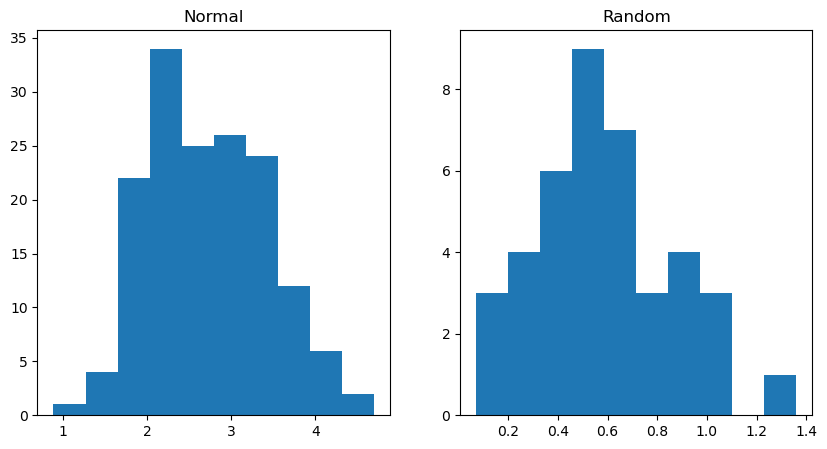

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(suma_normal)
plt.title('Normal')

plt.subplot(1, 2, 2)
plt.hist(suma_random)
plt.title('Random')

plt.show()